In [1]:
import pyemma
import os
import matplotlib.pyplot as plt
import numpy as np
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
from pyemma import config

In [2]:
#Global definations
p_res=228 # NUmber of protein amino-acid residues
topfile='/home/jaya/work/JK/hsp90/binding/xtc/prot_l1.pdb'

data=[]

for i in range(1,3):
    file_ = '/home/jaya/work/JK/hsp90/binding/msm/long/contact_distance_'+str(i)+'.npy'
    l = np.load(file_,allow_pickle=True)
    data.append(list(l))

for i in range(1,11):
    file_ = '/home/jaya/work/JK/hsp90/binding/msm/B_1/'+str(i)+'.npy'
    b1 = np.load(file_,allow_pickle=True)
    data.append(list(b1))

for i in range(1,11):
    file_ = '/home/jaya/work/JK/hsp90/binding/msm/B_2/'+str(i)+'.npy'
    b2 = np.load(file_,allow_pickle=True)
    data.append(list(b2))

for i in range(1,18):
    file_ = '/home/jaya/work/JK/hsp90/binding/msm/UB/'+str(i)+'.npy'
    ub = np.load(file_,allow_pickle=True)
    data.append(list(ub))


In [6]:
lag = 500  # tica lagtime
tica_obj = coor.tica(data, lag=lag, var_cutoff=0.80)
print ('Retained dimension: ', tica_obj.dimension())
Y = tica_obj.get_output()


100%|████████████████████████████████████████████████████████████████████| 42/42 [00:03<00:00, 12.61it/s]


Retained dimension:  48


100%|████████████████████████████████████████████████████████████████████| 42/42 [00:01<00:00, 23.16it/s]


In [8]:
np.save('/home/jaya/work/JK/hsp90/binding/msm/Y_48D.npy',Y)

/home/jaya/softwares/miniconda3/lib/python3.9/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [25]:
n_clusters = 1000

cluster = coor.cluster_kmeans(Y, k=n_clusters, max_iter=1000, tolerance=1e-10, fixed_seed=True)

#cluster.save('500C.h5')

dtrajs = cluster.dtrajs
np.save('/home/jaya/work/JK/hsp90/binding/msm/dtrajs_1000C', dtrajs)

histogram = np.bincount(np.concatenate(dtrajs), minlength=len(cluster.clustercenters))

np.savetxt('/home/jaya/work/JK/hsp90/binding/msm/cluster_counts_1000C.txt',histogram,fmt='%d')


100%|████████████████████████████████████████████████████████████████| 1000/1000 [03:20<00:00,  4.99it/s]

100%|████████████████████████████████████████████████████████████████████| 39/39 [00:01<00:00, 27.31it/s]
/home/jaya/softwares/miniconda3/lib/python3.9/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


<Figure size 720x576 with 0 Axes>

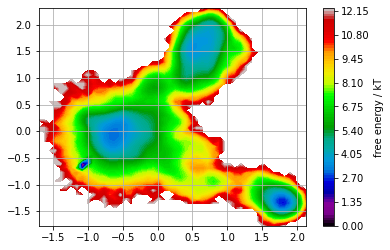

In [26]:
plt.figure(figsize=(10,8))
mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1],nbins=50)
plt.grid()
plt.savefig("/home/jaya/work/JK/hsp90/binding/msm/fes_1000C.png", dpi=310)


<Figure size 720x576 with 0 Axes>

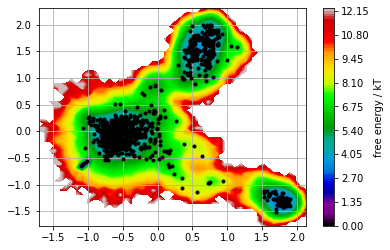

In [27]:
plt.figure(figsize=(10,8))
mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1],nbins=50)
cc_x=cluster.clustercenters[:,0]
cc_y=cluster.clustercenters[:,1]
plt.plot(cc_x,cc_y, linewidth=0, marker='o', markersize=3, color='black')
plt.grid()
plt.savefig("/home/jaya/work/JK/hsp90/binding/msm/fes_cc_1000C.png", dpi=310)

In [28]:
lags=1000
its = pyemma.msm.its(dtrajs, lags=lags , nits=10)

estimating MaximumLikelihoodMSM:   0%|                                            | 0/17 [00:00<?, ?it/s]

01-07-22 19:23:12 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[17] WARNING  Ignored error during estimation: Stationary distribution contains entries smaller than 1e-15 during iteration


estimating MaximumLikelihoodMSM:   6%|██                                  | 1/17 [00:00<00:12,  1.28it/s]

01-07-22 19:23:15 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[17] WARNING  Ignored error during estimation: Stationary distribution contains entries smaller than 1e-15 during iteration


estimating MaximumLikelihoodMSM:  12%|████▏                               | 2/17 [00:03<00:31,  2.11s/it]

01-07-22 19:23:15 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[17] WARNING  Ignored error during estimation: Stationary distribution contains entries smaller than 1e-15 during iteration


estimating MaximumLikelihoodMSM:  18%|██████▎                             | 3/17 [00:04<00:19,  1.36s/it]

01-07-22 19:23:21 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[17] WARNING  Ignored error during estimation: Stationary distribution contains entries smaller than 1e-15 during iteration


estimating MaximumLikelihoodMSM:  41%|██████████████▊                     | 7/17 [00:38<01:05,  6.57s/it]/home/jaya/softwares/miniconda3/lib/python3.9/site-packages/msmtools/estimation/api.py:956: NotConvergedWarning: Reversible transition matrix estimation didn't converge.
  result = sparse.mle.mle_trev.mle_trev(C, **kwargs)
estimating MaximumLikelihoodMSM:  59%|████████████████████▌              | 10/17 [01:00<00:40,  5.75s/it]/home/jaya/softwares/miniconda3/lib/python3.9/site-packages/msmtools/estimation/api.py:956: NotConvergedWarning: Reversible transition matrix estimation didn't converge.
  result = sparse.mle.mle_trev.mle_trev(C, **kwargs)
estimating MaximumLikelihoodMSM:  65%|██████████████████████▋            | 11/17 [01:01<00:25,  4.27s/it]/home/jaya/softwares/miniconda3/lib/python3.9/site-packages/msmtools/estimation/api.py:956: NotConvergedWarning: Reversible transition matrix estimation didn't converge.
  result = sparse.mle.mle_trev.mle_trev(C, **kwargs)
estimating Maxim

01-07-22 19:24:35 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[15] WARNING  Estimation has failed at lagtimes: [ 315  473  710 1000]. Details:
['Error at lag time 315: Stationary distribution contains entries smaller than '
 '1e-15 during iteration',
 'Error at lag time 473: Stationary distribution contains entries smaller than '
 '1e-15 during iteration',
 'Error at lag time 710: Stationary distribution contains entries smaller than '
 '1e-15 during iteration',
 'Error at lag time 1000: Stationary distribution contains entries smaller '
 'than 1e-15 during iteration']


01-07-22 19:24:36 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[15] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/tmp/ipykernel_30214/1125704223.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, )
/tmp/ipykernel_30214/1125704223.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, )
/tmp/ipykernel_30214/1125704223.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, )
/tmp/ipykernel_30214/1125704223.py:28: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, )
/tmp/ipykernel_30214/1125704223.py:36: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, )


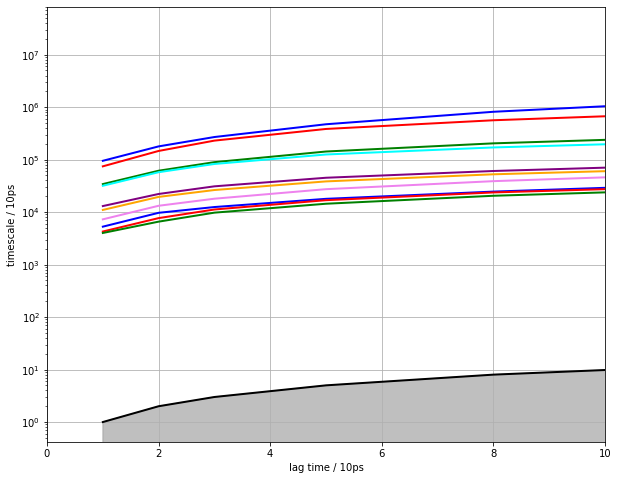

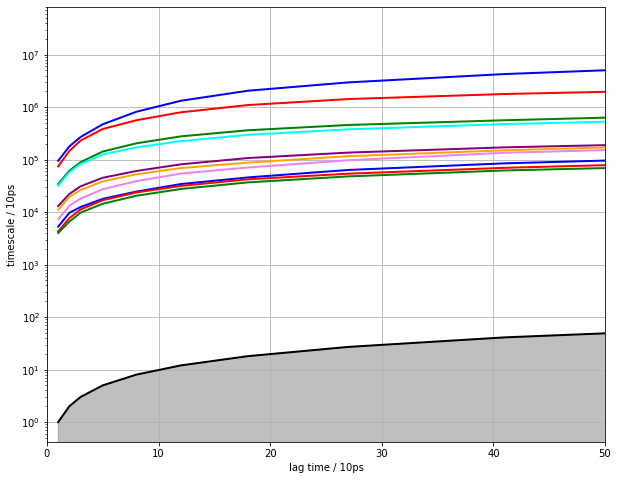

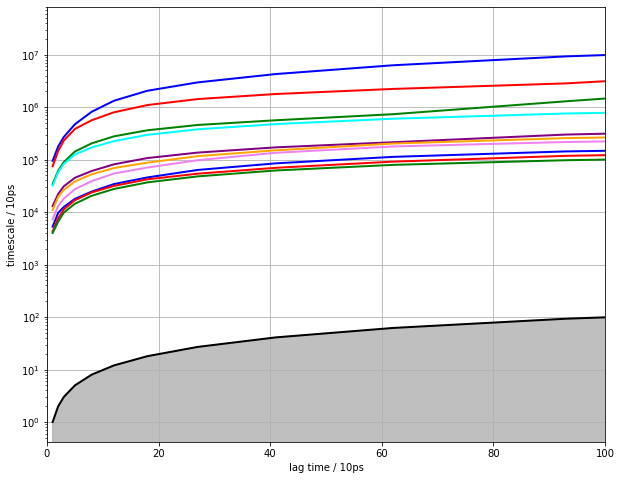

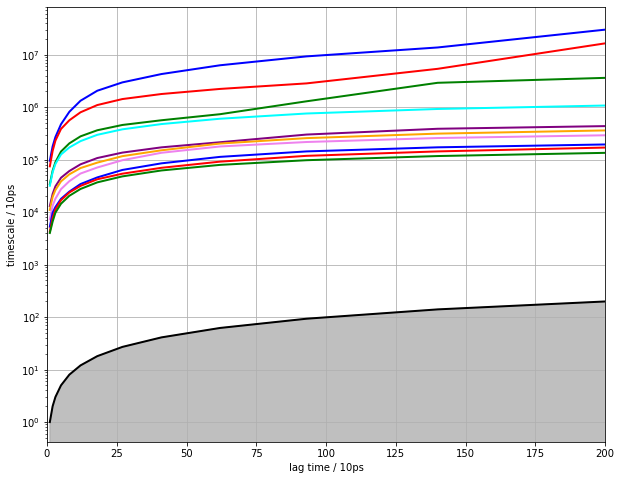

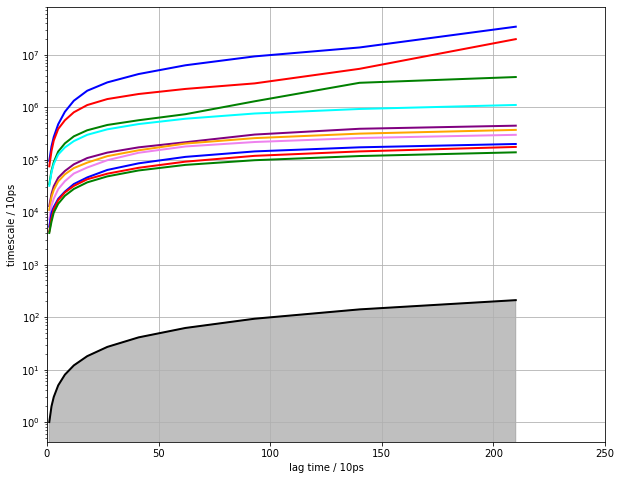

In [43]:
plt.figure(figsize=(10,8))
mplt.plot_implied_timescales(its, ylog=True, show_mean=False, units='10ps', linewidth=2)
plt.ylim(0, )
plt.xlim(0, 10)
plt.grid(axis='both')
plt.savefig('/home/jaya/work/JK/hsp90/binding/msm/its_1.png')
#plt.clf()


plt.figure(figsize=(10,8))
mplt.plot_implied_timescales(its, ylog=True, show_mean=False, units='10ps', linewidth=2)
plt.ylim(0, )
plt.xlim(0, 50)
plt.grid(axis='both')
plt.savefig('/home/jaya/work/JK/hsp90/binding/msm/its_2.png')
#plt.clf()

plt.figure(figsize=(10,8))
mplt.plot_implied_timescales(its, ylog=True, show_mean=False, units='10ps', linewidth=2)
plt.ylim(0, )
plt.xlim(0, 100)
plt.grid(axis='both')
plt.savefig('/home/jaya/work/JK/hsp90/binding/msm/its_3.png')
#plt.clf()

plt.figure(figsize=(10,8))
mplt.plot_implied_timescales(its, ylog=True, show_mean=False, units='10ps', linewidth=2)
plt.ylim(0, )
plt.xlim(0, 200)
plt.grid(axis='both')
plt.savefig('/home/jaya/work/JK/hsp90/binding/msm/its_4.png')
#plt.clf()

plt.figure(figsize=(10,8))
mplt.plot_implied_timescales(its, ylog=True, show_mean=False, units='10ps', linewidth=2)
plt.ylim(0, )
plt.xlim(0, 250)
plt.grid(axis='both')
plt.savefig('/home/jaya/work/JK/hsp90/binding/msm/its_5.png')
#plt.clf()

    



/home/jaya/softwares/miniconda3/lib/python3.9/site-packages/msmtools/estimation/api.py:956: NotConvergedWarning: Reversible transition matrix estimation didn't converge.
  result = sparse.mle.mle_trev.mle_trev(C, **kwargs)
estimating MaximumLikelihoodMSM:   0%|                                             | 0/9 [00:00<?, ?it/s]/home/jaya/softwares/miniconda3/lib/python3.9/site-packages/msmtools/estimation/api.py:956: NotConvergedWarning: Reversible transition matrix estimation didn't converge.
  result = sparse.mle.mle_trev.mle_trev(C, **kwargs)
estimating MaximumLikelihoodMSM:  11%|████                                 | 1/9 [01:25<11:23, 85.46s/it]/home/jaya/softwares/miniconda3/lib/python3.9/site-packages/msmtools/estimation/api.py:956: NotConvergedWarning: Reversible transition matrix estimation didn't converge.
  result = sparse.mle.mle_trev.mle_trev(C, **kwargs)
/home/jaya/softwares/miniconda3/lib/python3.9/site-packages/msmtools/estimation/api.py:956: NotConvergedWarning: Reversib

fraction of states used =  1.0
fraction of counts used =  1.0


<Figure size 720x576 with 0 Axes>

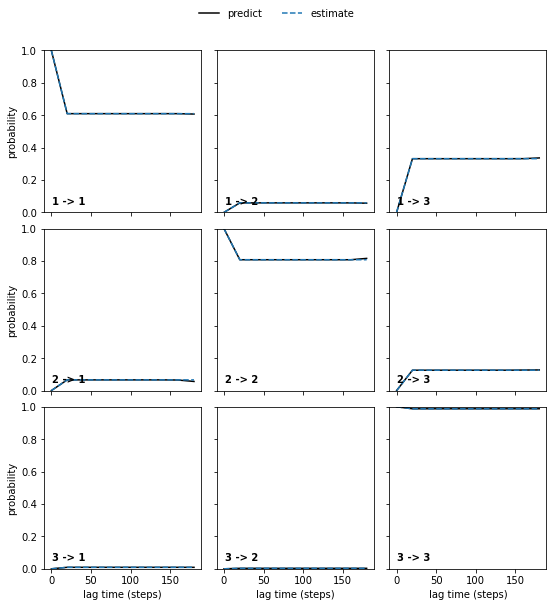

In [61]:
lag=20
n_states=3

M = msm.estimate_markov_model(dtrajs, lag=lag)
#M.save('M_50.h5',overwrite=True)
#M=msm.bayesian_markov_model(dtrajs, lag=lag)


plt.figure(figsize=(10,8))
mplt.plot_cktest(M.cktest(n_states))
plt.savefig('/home/jaya/work/JK/hsp90/binding/msm/ck20_3.png',dpi=110)
#plt.clf()

print('fraction of states used = ', M.active_state_fraction)
print('fraction of counts used = ', M.active_count_fraction)

In [2]:
M=pyemma.load('./binding/msm/1000C/M_20.h5')

In [3]:
M.pcca(4)

PCCA(P=array([[0.23718, 0.     , ..., 0.     , 0.     ],
       [0.     , 0.73   , ..., 0.     , 0.     ],
       ...,
       [0.     , 0.     , ..., 0.83658, 0.     ],
       [0.     , 0.     , ..., 0.     , 0.90684]]),
   m=4)

In [4]:
for i in range(0,4):
    np.savetxt('/home/jaya/work/JK/hsp90/binding/msm/1000C/states_4_20l/'+str(i+1)+'.txt', M.metastable_sets[i],fmt='%i')

In [5]:
for i, s in enumerate(M.metastable_sets):
    print('π_{} = {:f}'.format(i + 1, M.pi[s].sum()))


π_1 = 0.009638
π_2 = 0.048516
π_3 = 0.018433
π_4 = 0.923413


Text(0, 0.5, 'TIC2')

<Figure size 720x576 with 0 Axes>

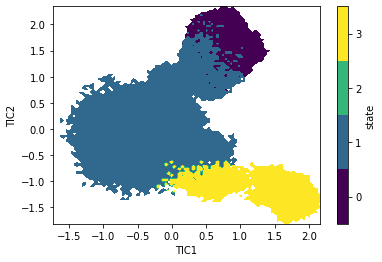

In [8]:
dtrajs = np.load('/home/jaya/work/JK/hsp90/binding/msm/1000C/dtrajs_1000C.npy',allow_pickle=True)
Y = np.load('/home/jaya/work/JK/hsp90/binding/msm/Y_48D.npy',allow_pickle=True)

metastable_traj = M.metastable_assignments[np.concatenate(dtrajs)]

plt.figure(figsize=(10,8))
pyemma.plots.plot_state_map(
    *np.concatenate(Y)[:, :2].T, metastable_traj)
plt.xlabel('TIC1')
plt.ylabel('TIC2')
#plt.show()
#plt.savefig('pcca.png',dpi=310)
